In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.utils.data import download_file

In [3]:
from astropy.io import fits
from astropy import wcs
import sys
import os
import glob
import cv2
import gzip

In [10]:
image_name = '01_03NOV21_S21112_0004_cutout_0407.fits'
#folder_name = 'im332p64277_-22p66323_0p1_231335147657'
folder_name = 'im332p64277_-22p66323_0p1_231053769721'
#image_path = '/home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231335147657/' + image_name
image_path = '/home/oem/Documentos/Astronomy/CRTS/'
all_images = glob.glob( image_path + folder_name +'/*.fits') 
print(all_images[1])


/home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231053769721/01_12NOV07_S23110_0002_cutout_3332.fits


In [11]:
image_name = '01_03NOV21_S21112_0004_cutout_0407.fits'
folder_name = 'im332p64277_-22p66323_0p1_231335147657'
#image_path = '/home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231335147657/' + image_name
image_path = '/home/oem/Documentos/Astronomy/CRTS/'
all_images = glob.glob( image_path + folder_name +'/*.fits') 
print('Number of fits images for one object:',len(all_images))

hdu_list = fits.open(all_images[0])
hdu_list.info()
#hdu_list.header
image_data = hdu_list[0].data
#convert from WC to pixel coordinate
#RA/DEC from the table in the web page 
RA = 332.667502722
DEC = -22.6571085044
w = wcs.WCS(hdu_list[0].header)
print(w)
#print(w.wcs.name)
w.wcs.print_contents()
worldcrd = np.array([[RA ,DEC]]) #shape = (1,2)
pixcrd = w.wcs_world2pix(worldcrd, 1) #1 is for the origin in FITS ims
print('Pixel coordinates:',pixcrd)

Number of fits images for one object: 98
Filename: /home/oem/Documentos/Astronomy/CRTS/im332p64277_-22p66323_0p1_231335147657/02_09SEP24_S23110_0001_cutout_3133.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      98   (120, 136)   int16 (rescales to uint16)   
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 333.92759509000001  -23.995028005000002  
CRPIX : -1664.5  -1911.5  
CD1_1 CD1_2  : -0.00069506752200000003  -3.71538e-07  
CD2_1 CD2_2  : -3.7133300000000001e-07  0.000695451118  
NAXIS : 120  136
Pixel coordinates: [[ 8.13590254  6.47024771]]


CO1_2   =-0.000695057774896105                                                   [astropy.io.fits.card]
CO1_3   =-4.35085722047957E-07                                                   [astropy.io.fits.card]
CO1_6   =-3.85464689376223E-11                                                   [astropy.io.fits.card]
CO2_1   =-0.000107576489240282                                                   [astropy.io.fits.card]
CO2_2   =-2.97873497034787E-07                                                   [astropy.io.fits.card]
CO2_6   =-3.72194771429584E-12                                                   [astropy.io.fits.card]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [12]:
print(type(image_data))
print(image_data.shape)
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

<class 'numpy.ndarray'>
(136, 120)
Min: 3317
Max: 15989
Mean: 3462.71568627
Stdev: 225.380050592


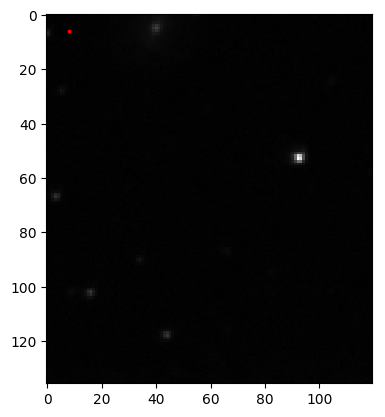

In [13]:
#visualization
plt.imshow(image_data, cmap='gray')
plt.scatter(int(pixcrd[0,0]), int(pixcrd[0,1]),color='r',s=3)
#cv2.circle(image_data, (int(pixcrd[0,0]),int(pixcrd[0,1])), 5, (0,0,0), -1)
#plt.colorbar()

In [8]:
#histogram
#plt.hist(image_data, bins=256, range=(0.0, 1.0), fc='k', ec='k')

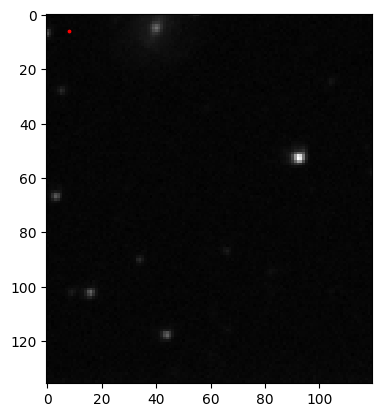

In [9]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.scatter(int(pixcrd[0,0]), int(pixcrd[0,1]),color='r',s=3)
# I chose the tick marks based on the histogram above
#cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
#cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

## Visualize all the images of one object

In [14]:

list_of_ims = []
for file_name in all_images:
    hdu_list = fits.open(file_name)
    image_data = hdu_list[0].data
    print(np.shape(image_data))
    list_of_ims.append(image_data)

    #plt.close()


CO1_2   =-0.000695057774896105                                                   [astropy.io.fits.card]
CO1_3   =-4.35085722047957E-07                                                   [astropy.io.fits.card]
CO1_6   =-3.85464689376223E-11                                                   [astropy.io.fits.card]
CO2_1   =-0.000107576489240282                                                   [astropy.io.fits.card]
CO2_2   =-2.97873497034787E-07                                                   [astropy.io.fits.card]
CO2_6   =-3.72194771429584E-12                                                   [astropy.io.fits.card]
CO1_1   =-1.15518187612511E-05                                                   [astropy.io.fits.card]
CO1_2   =-0.000695043411432016                                                   [astropy.io.fits.card]
CO1_3   =-1.28220458652598E-06                                                   [astropy.io.fits.card]
CO1_6   =-4.67427695309841E-11                                  

(136, 120)
(120, 150)
(136, 120)
(136, 120)
(136, 120)
(136, 120)
(136, 120)
(120, 120)
(120, 120)
(120, 120)
(136, 120)
(140, 120)
(120, 120)

: The following header keyword is invalid or follows an unrecognized non-standard convention:
CO1_6   =-7.27853602173217E-12                                                   [astropy.io.fits.card]
CO2_1   =-8.06025631106706E-06                                                   [astropy.io.fits.card]
CO2_2   =-4.38962832019027E-06                                                   [astropy.io.fits.card]
CO2_4   =-1.34148271254682E-11                                                   [astropy.io.fits.card]
CO1_1   =-9.55667303853174E-06                                                   [astropy.io.fits.card]
CO1_2   =-0.000695074771643098                                                   [astropy.io.fits.card]
CO1_6   =-4.33731056811545E-11                                                   [astropy.io.fits.card]
CO2_1   =-9.25805395067974E-05                                                   [astropy.io.fits.card]
CO1_2   =-0.000695066910064447                                            


(136, 120)
(136, 120)
(120, 120)
(120, 150)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(136, 120)
(120, 120)


CO1_3   =-5.13669813433027E-07                                                   [astropy.io.fits.card]
CO1_6   =-3.48903223064733E-11                                                   [astropy.io.fits.card]
CO2_1   =-8.93573321017309E-05                                                   [astropy.io.fits.card]
CO2_2   =-5.09912640001812E-07                                                   [astropy.io.fits.card]
CO2_6   =-3.87211618586589E-12                                                   [astropy.io.fits.card]
CO1_2   =-0.000695094296944584                                                   [astropy.io.fits.card]
CO1_6   =-4.91156811190337E-11                                                   [astropy.io.fits.card]
CO2_1   =-7.76477527195116E-05                                                   [astropy.io.fits.card]
CO2_2   =-1.25071293123232E-06                                                   [astropy.io.fits.card]
CO2_6   =-2.32143571732176E-12                                  

(136, 120)
(136, 120)
(120, 120)
(136, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)



CO1_2   =-0.000695157162391173                                                   [astropy.io.fits.card]
CO1_3   =-3.12851098147907E-06                                                   [astropy.io.fits.card]
CO1_6   =-5.89711323720213E-11                                                   [astropy.io.fits.card]
CO2_1   =-8.81148313929319E-05                                                   [astropy.io.fits.card]
CO2_2   =-2.87302500076544E-06                                                   [astropy.io.fits.card]
CO1_3   =-5.95631866918161E-07                                                   [astropy.io.fits.card]
CO1_4   =-5.36935301551305E-12                                                   [astropy.io.fits.card]
CO1_6   =-3.79451210858813E-11                                                   [astropy.io.fits.card]
CO2_1   =-9.89407406201423E-05                                                   [astropy.io.fits.card]
CO2_2   =-5.83688546937362E-07                                 

(120, 120)
(136, 120)
(120, 120)
(136, 120)
(136, 120)
(136, 120)
(120, 120)
(136, 120)
(136, 120)
(136, 120)
(136, 120)
(136, 120)
(140, 120)
(140, 120)
(136, 120)
(120, 120)
(120, 120)
(120, 120)
(136, 120)


: The following header keyword is invalid or follows an unrecognized non-standard convention:
CO2_2   =-1.48731601467429E-06                                                   [astropy.io.fits.card]
CO2_6   =-4.80707805481517E-12                                                   [astropy.io.fits.card]
CO1_2   =-0.000695021348152246                                                   [astropy.io.fits.card]
CO1_3   =-1.94923536448637E-06                                                   [astropy.io.fits.card]
CO1_5   =-3.16117233604154E-12                                                   [astropy.io.fits.card]
CO1_6   =-2.82272945140189E-11                                                   [astropy.io.fits.card]
CO2_1   =-7.75268152878777E-05                                                   [astropy.io.fits.card]
CO2_2   =-1.90510001887333E-06                                                   [astropy.io.fits.card]
CO1_1   =-6.08925381917538E-06                                            

(120, 120)
(120, 120)
(120, 120)
(136, 150)
(136, 120)
(120, 120)
(120, 120)
(120, 120)
(136, 120)
(120, 120)
(120, 120)
(120, 120)
(136, 120)


CO1_3   =-1.62243181642917E-06                                                   [astropy.io.fits.card]
CO1_6   =-4.97796676785355E-11                                                   [astropy.io.fits.card]
CO2_1   =-8.30887565243355E-05                                                   [astropy.io.fits.card]
CO2_2   =-1.44581158469278E-06                                                   [astropy.io.fits.card]
CO2_6   =-1.20913734777018E-11                                                   [astropy.io.fits.card]
CO1_4   =-5.68351861682785E-12                                                   [astropy.io.fits.card]
CO1_6   =-4.09069160936648E-11                                                   [astropy.io.fits.card]
CO2_1   =-8.89873998967746E-05                                                   [astropy.io.fits.card]
CO1_2   =-0.000695025196438978                                                   [astropy.io.fits.card]
CO1_3   =-1.90793040264601E-06                                  

(136, 120)
(136, 120)
(136, 120)
(136, 120)
(120, 120)
(136, 120)
(120, 120)
(136, 120)



CO2_6   =-1.10549349535408E-12                                                   [astropy.io.fits.card]
CO1_1   =-2.60086076040943E-05                                                   [astropy.io.fits.card]
CO1_2   =-0.000695069659485783                                                   [astropy.io.fits.card]
CO1_6   =-3.83490509504732E-11                                                   [astropy.io.fits.card]
CO2_1   =-9.59201428845356E-05                                                   [astropy.io.fits.card]
CO2_2   =-7.51973394129746E-07                                                   [astropy.io.fits.card]
CO1_2   =-0.000695044059339814                                                   [astropy.io.fits.card]
CO1_3   =-6.45252479882134E-07                                                   [astropy.io.fits.card]
CO1_4   =-6.35506834479594E-12                                                   [astropy.io.fits.card]
CO1_6   =-2.61137291642033E-11                                 

(120, 120)
(136, 120)
(120, 120)
(136, 120)
(136, 120)
(120, 120)
(136, 120)
(120, 120)
(136, 120)
(120, 120)
(136, 120)
(136, 120)
(140, 120)
(136, 120)
(136, 120)
(136, 120)
(120, 120)
(120, 120)
(120, 120)
(136, 120)
(136, 120)
(136, 120)


CO1_4   =-6.03099561687438E-13                                                   [astropy.io.fits.card]
CO1_5   =-2.56183166501394E-12                                                   [astropy.io.fits.card]
CO1_6   =-3.66676978389267E-11                                                   [astropy.io.fits.card]
CO2_1   =-9.84704367742314E-05                                                   [astropy.io.fits.card]
CO2_2   =-3.35381215851162E-07                                                   [astropy.io.fits.card]
CO1_1   =-4.22809382365652E-07                                                   [astropy.io.fits.card]
CO1_2   =-0.000695032563404183                                                   [astropy.io.fits.card]
CO1_3   =-6.54209861435536E-07                                                   [astropy.io.fits.card]
CO1_6   =-3.86142360583154E-11                                                   [astropy.io.fits.card]
CO2_2   =-5.74744554323891E-07                                  

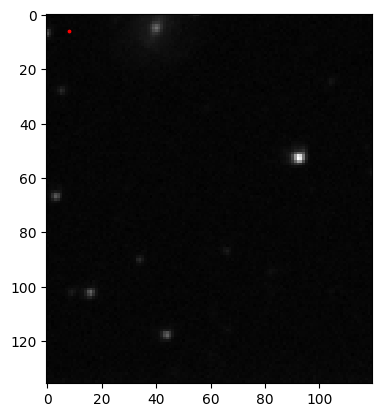

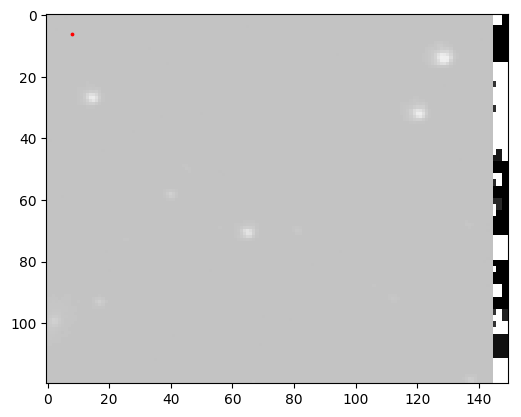

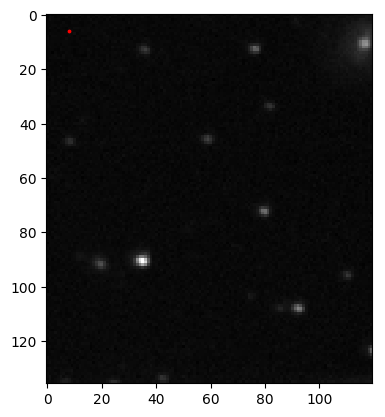

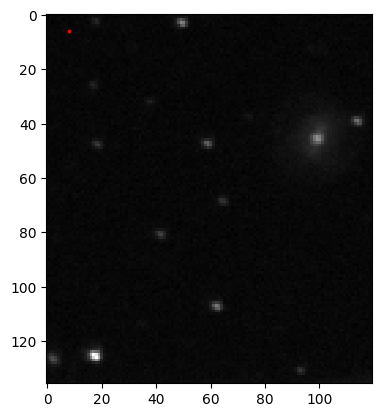

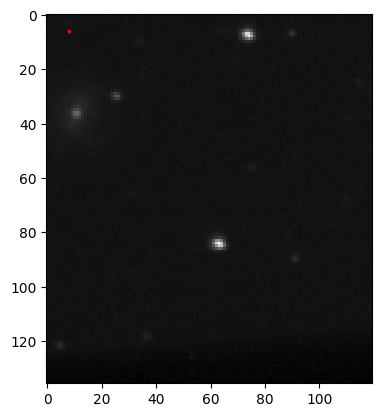

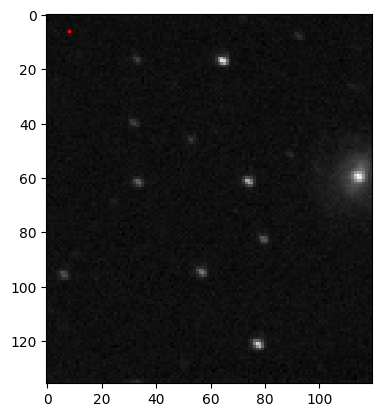

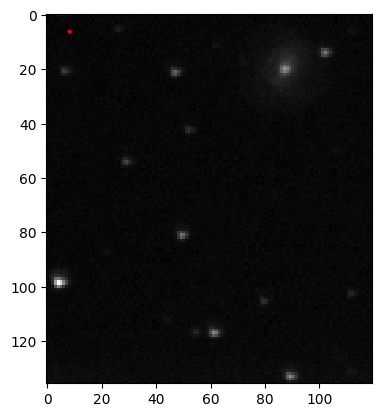

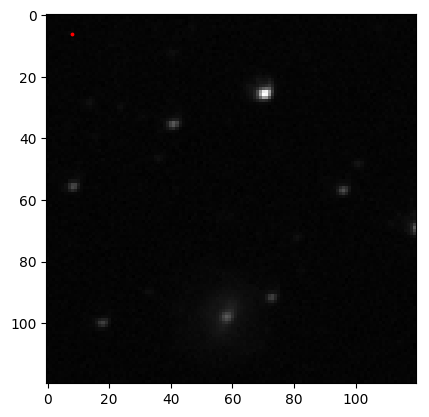

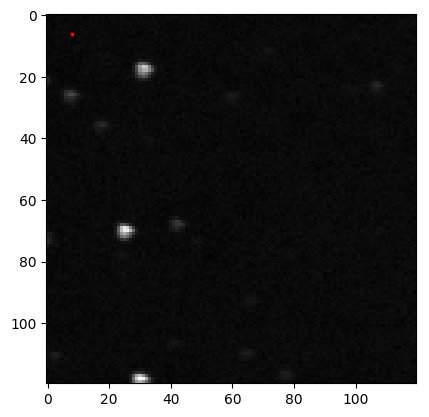

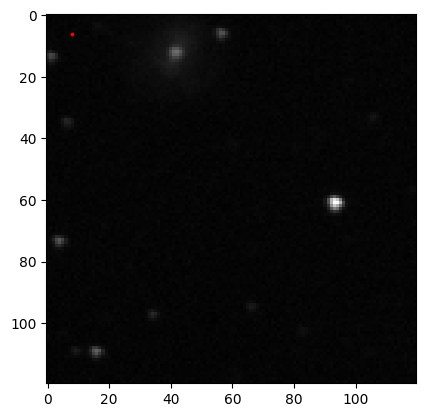

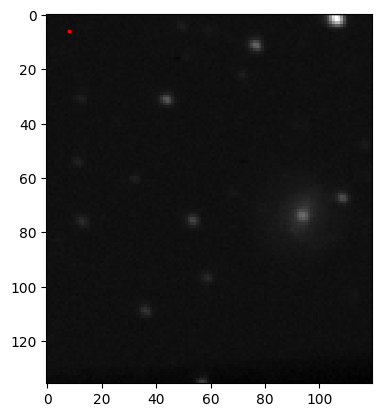

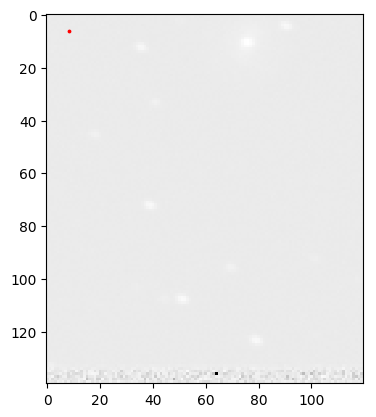

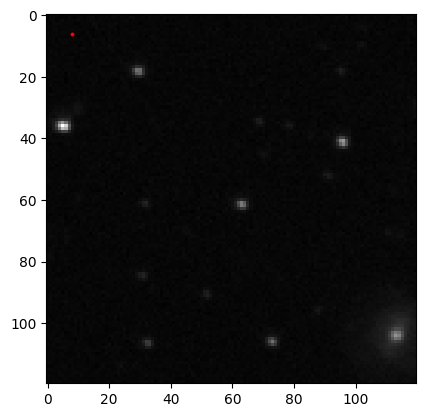

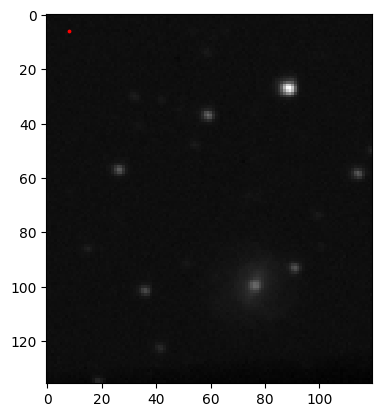

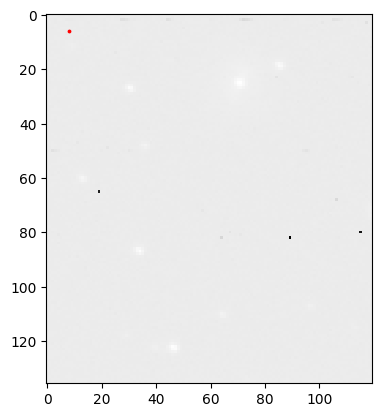

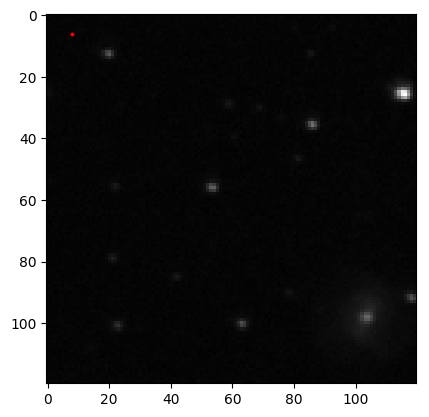

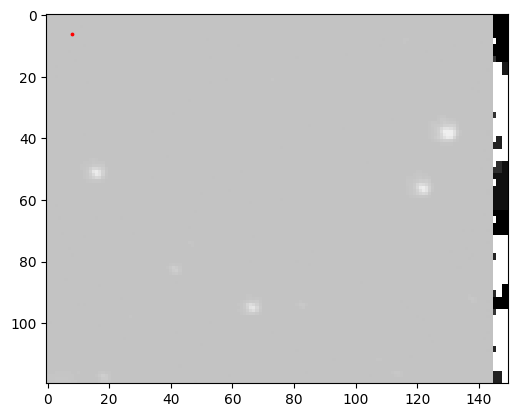

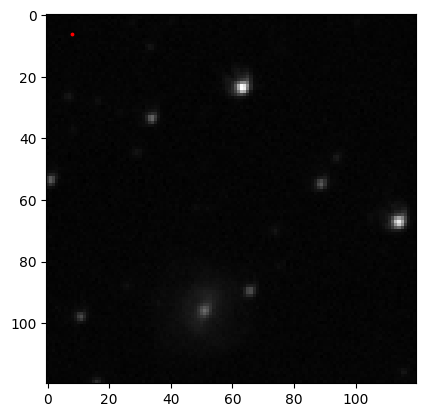

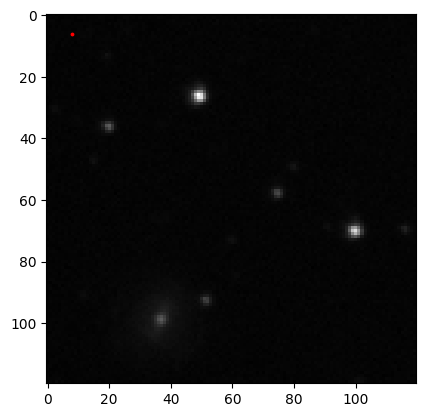

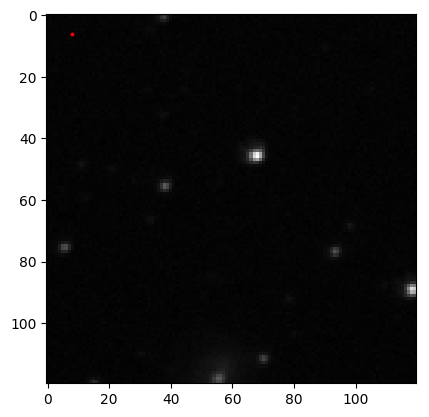

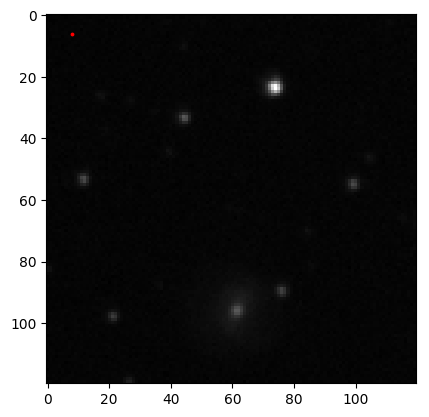

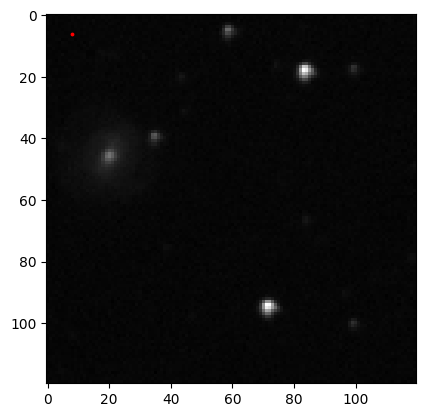

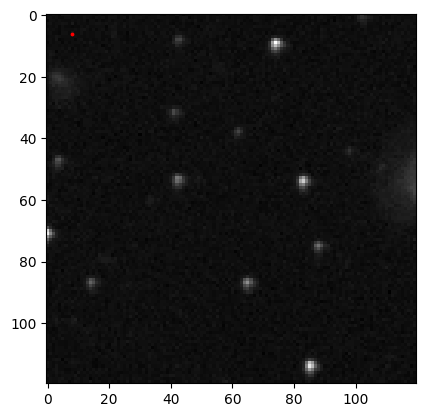

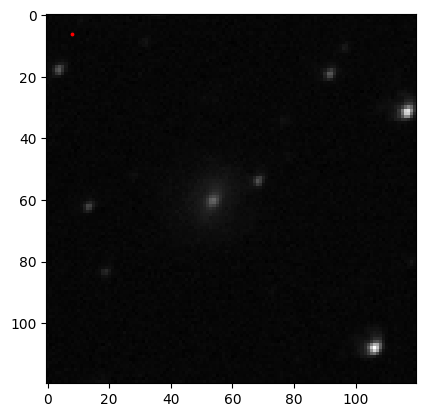

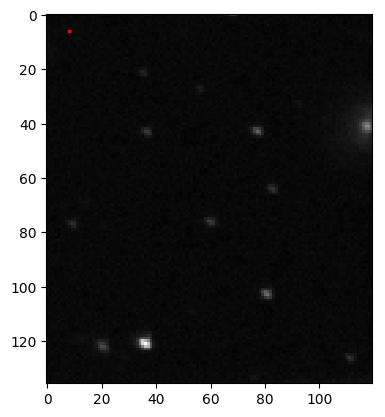

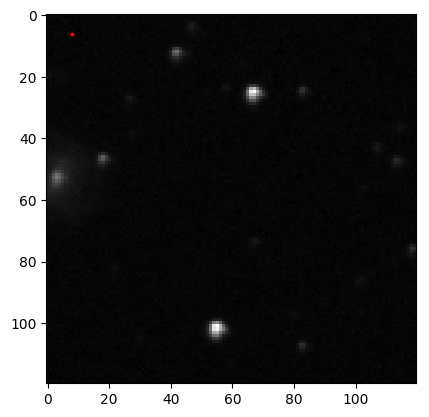

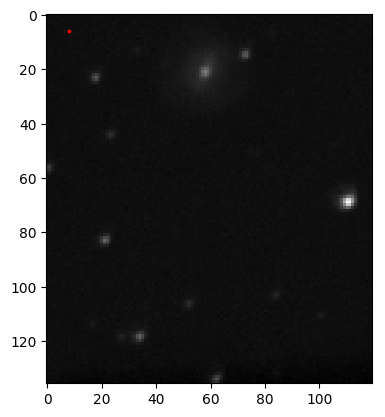

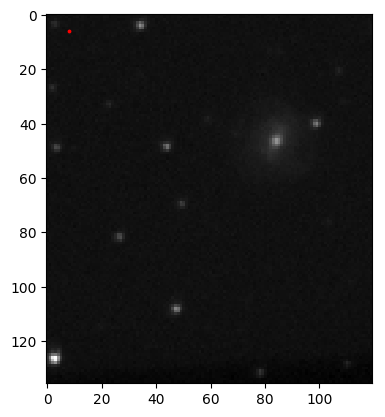

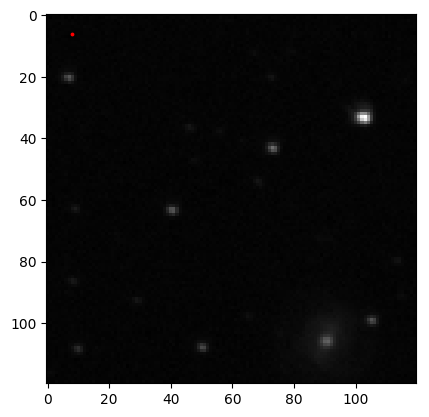

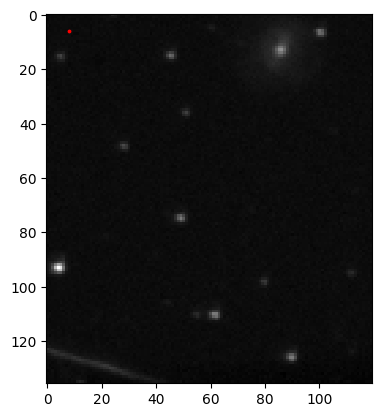

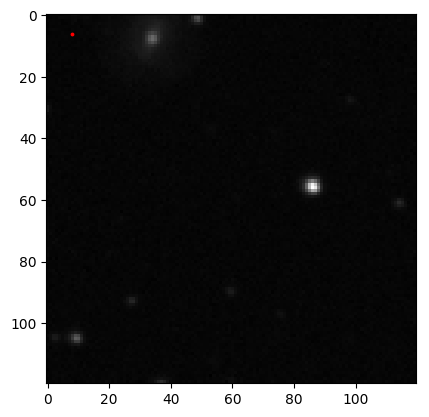

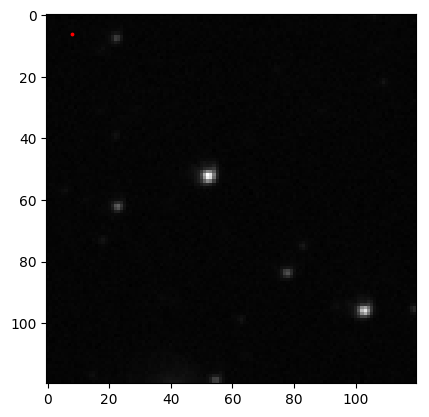

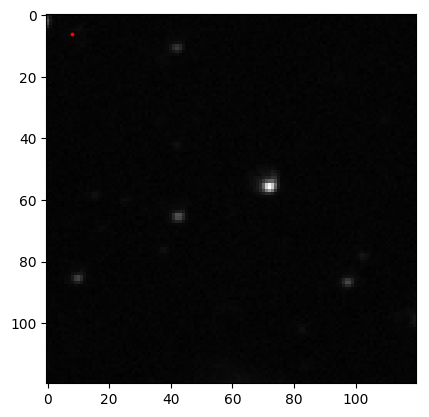

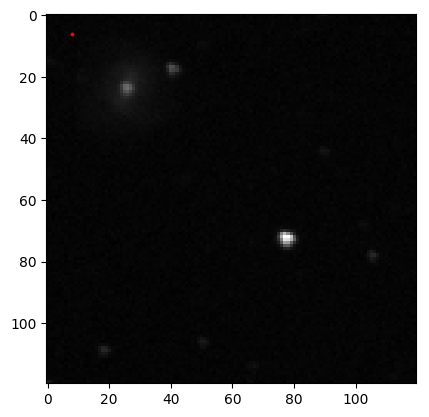

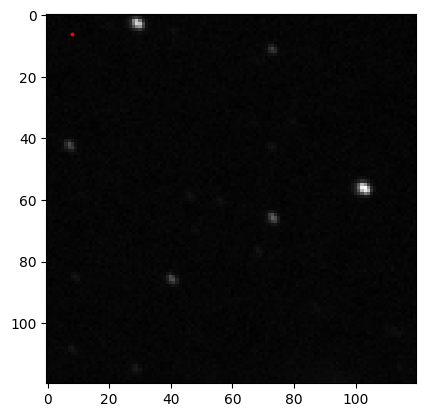

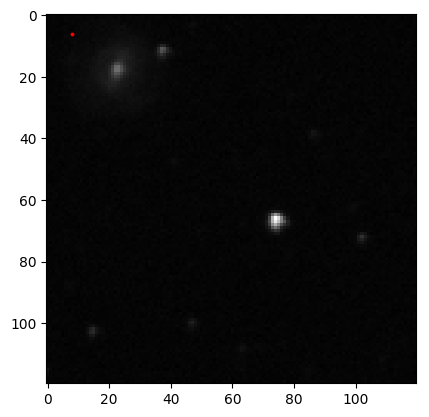

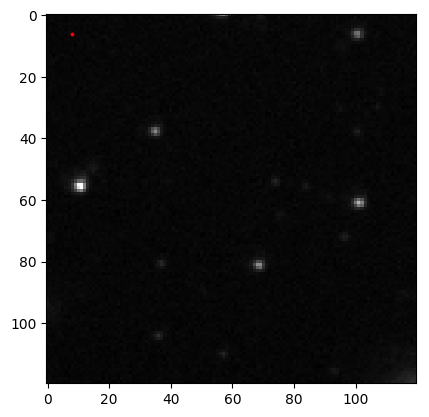

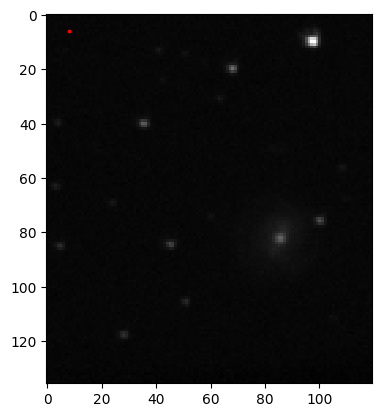

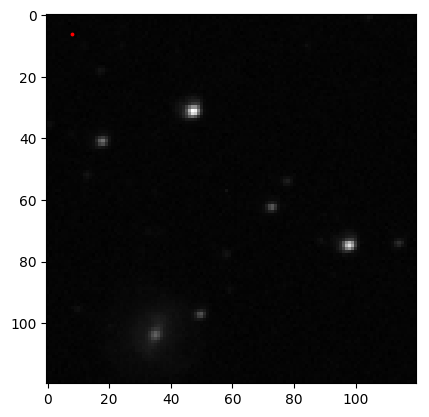

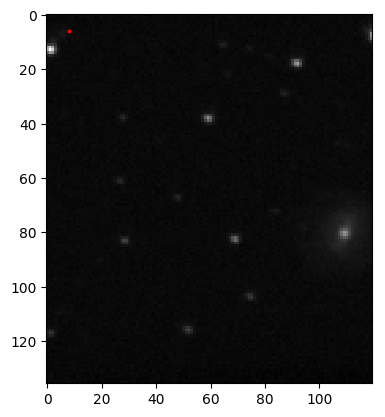

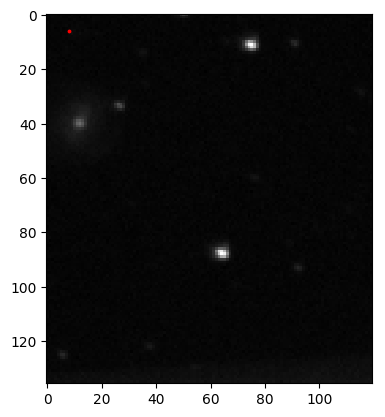

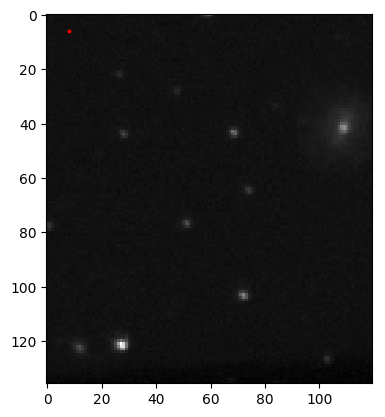

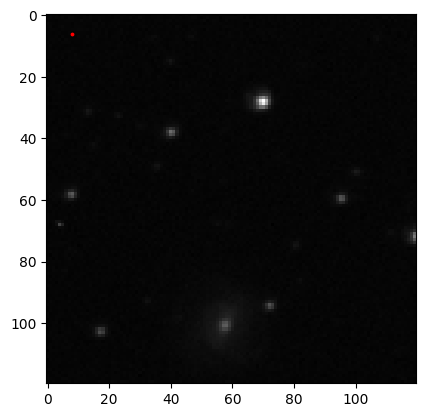

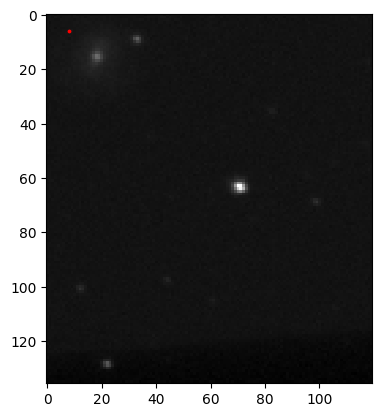

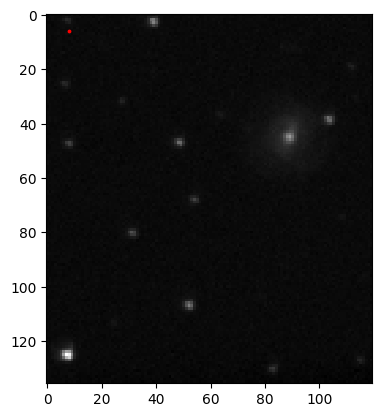

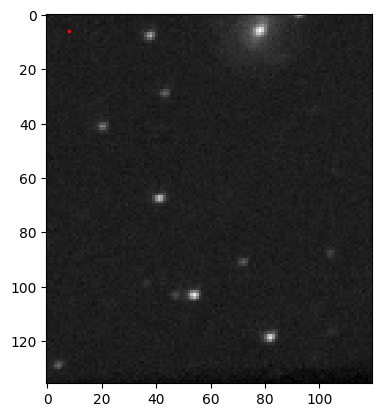

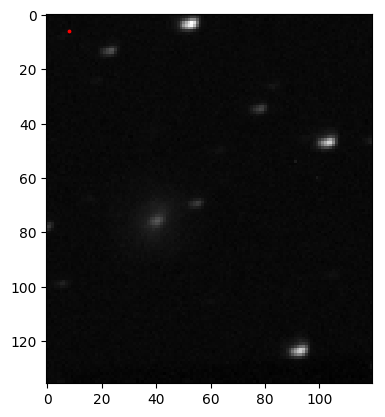

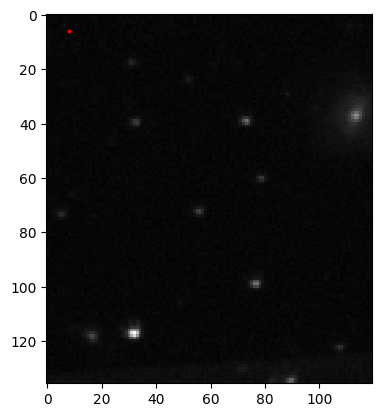

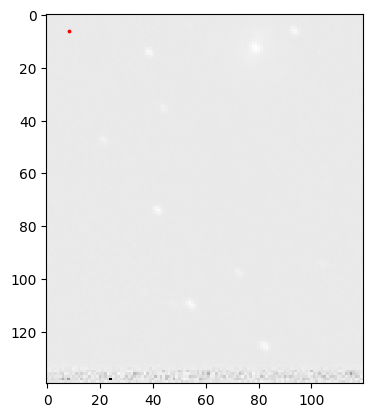

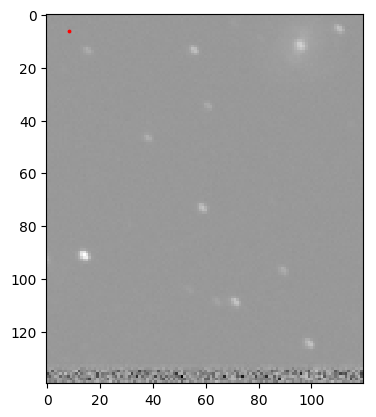

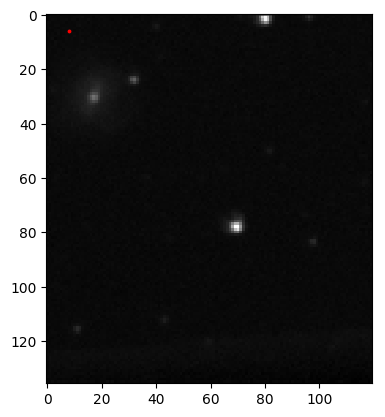

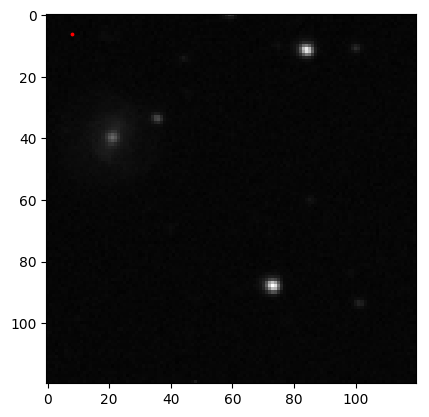

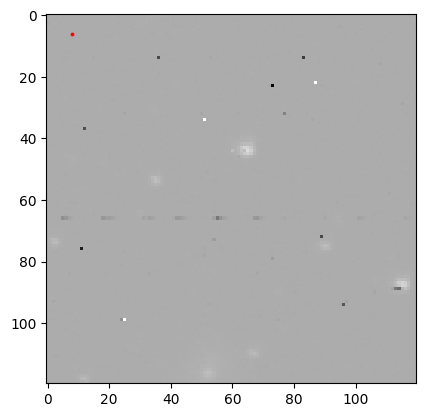

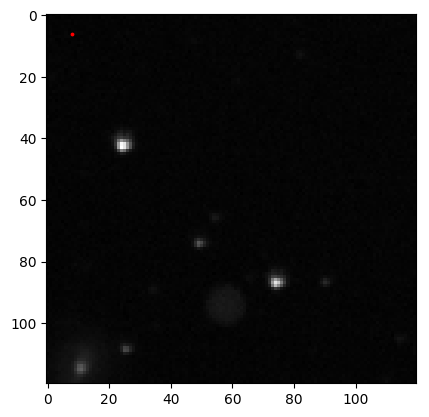

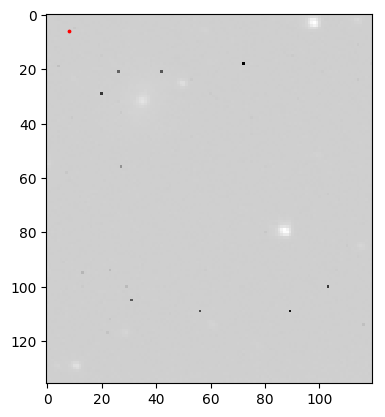

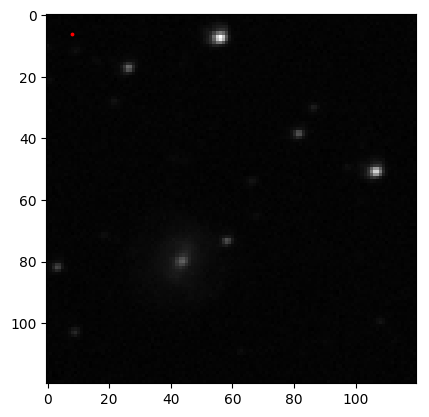

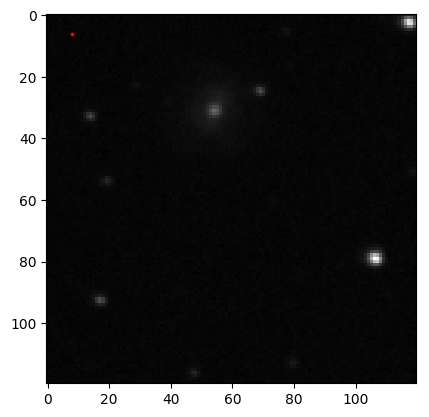

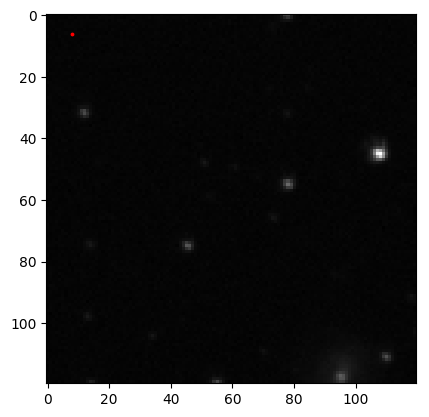

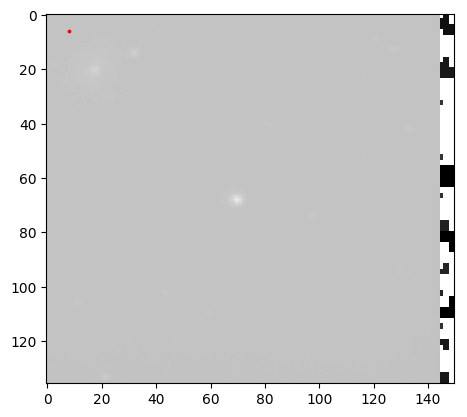

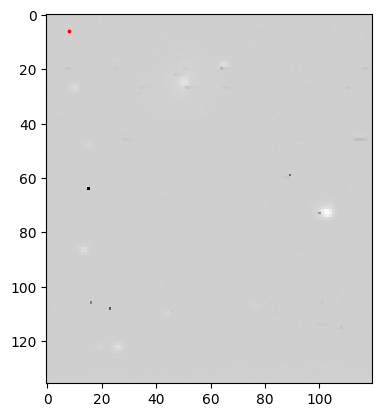

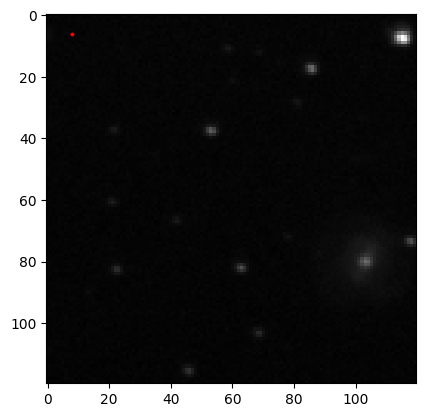

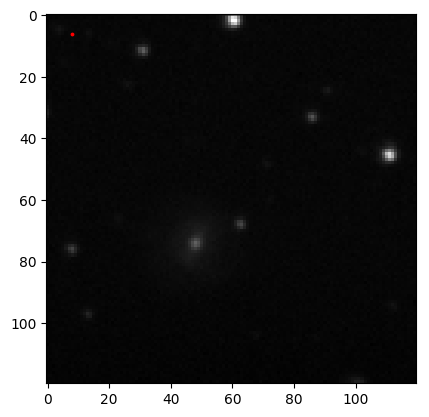

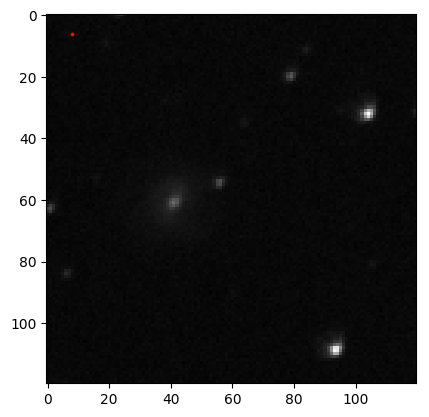

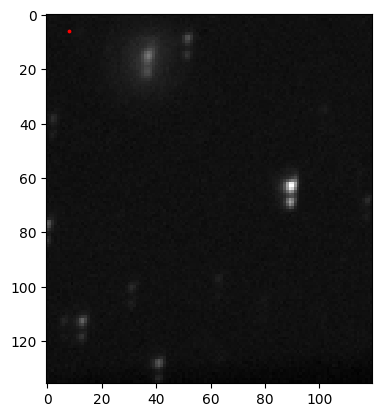

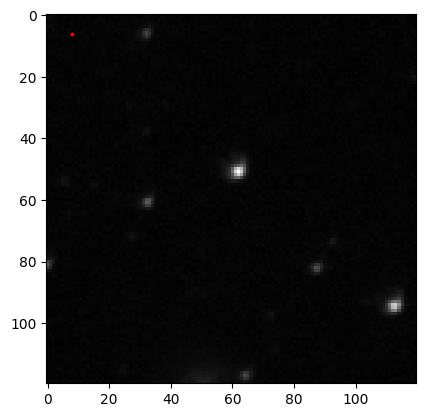

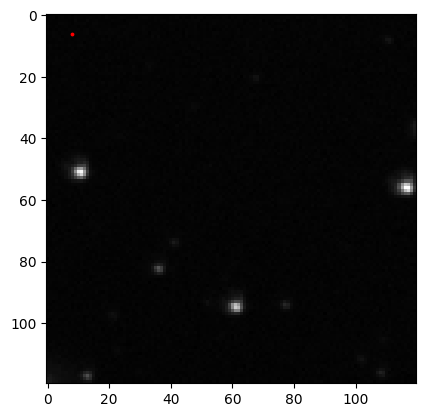

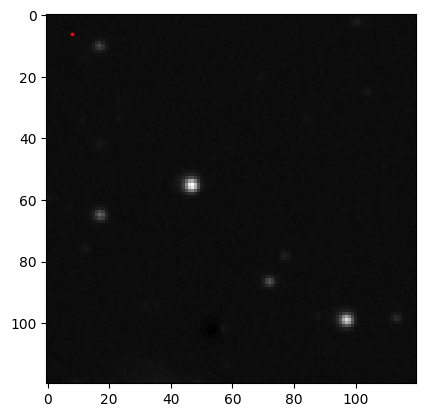

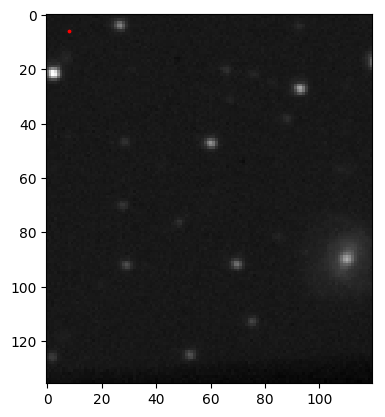

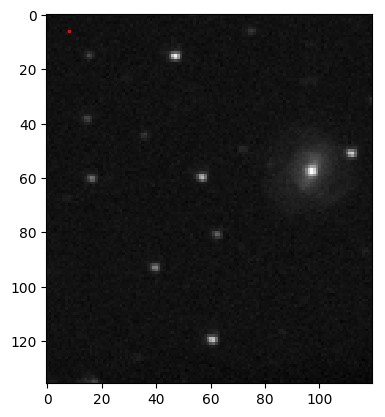

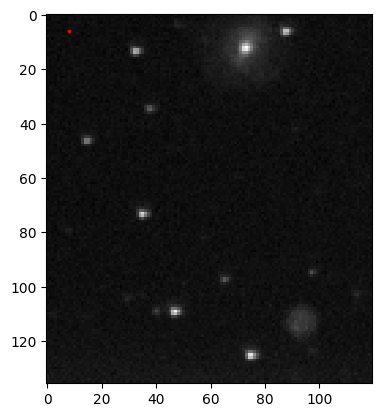

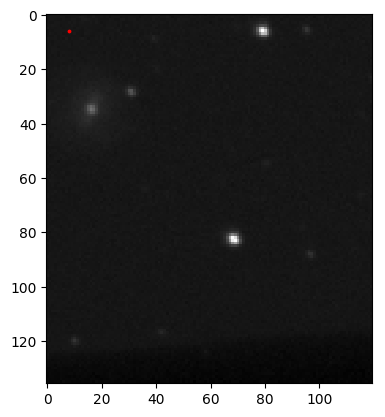

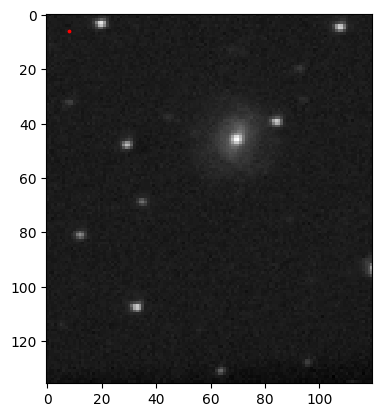

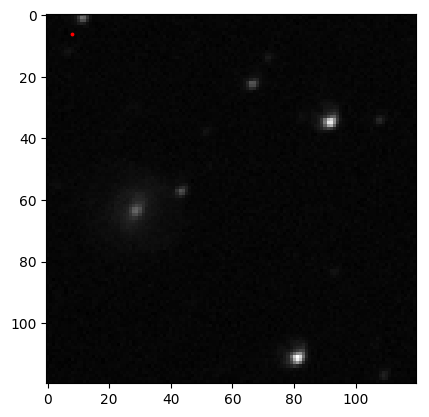

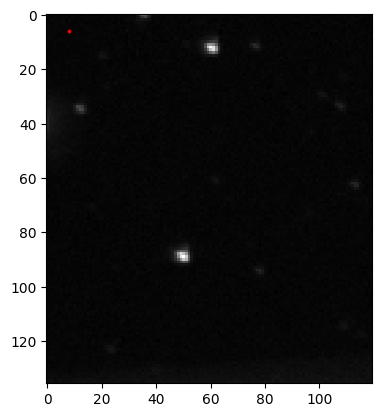

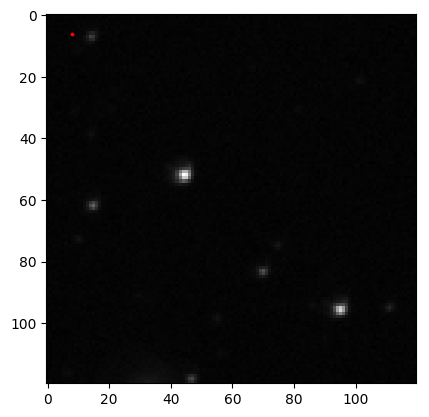

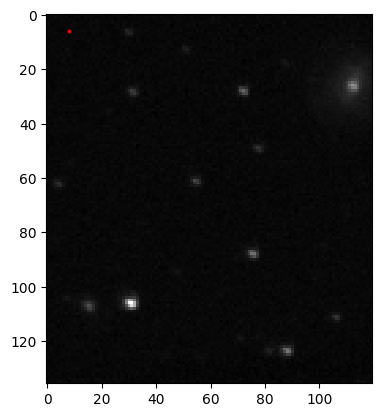

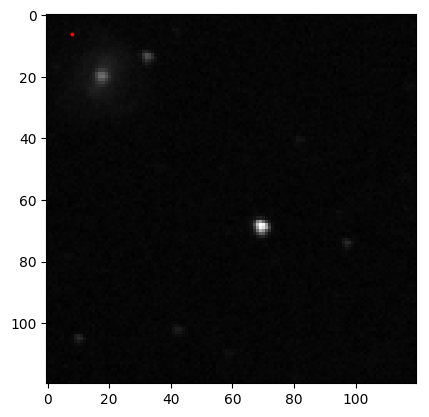

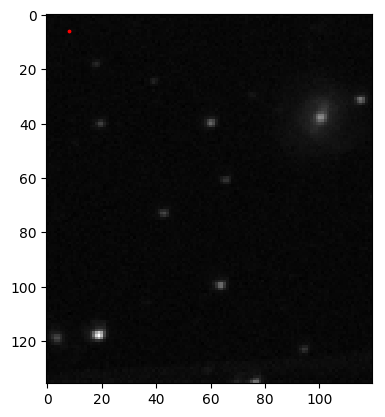

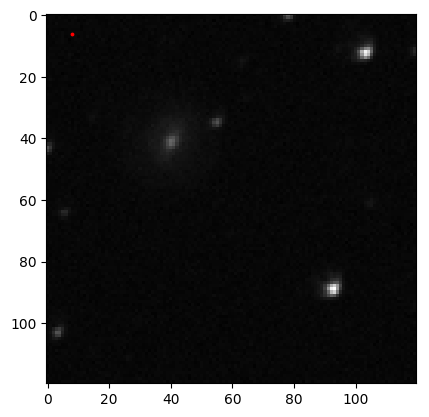

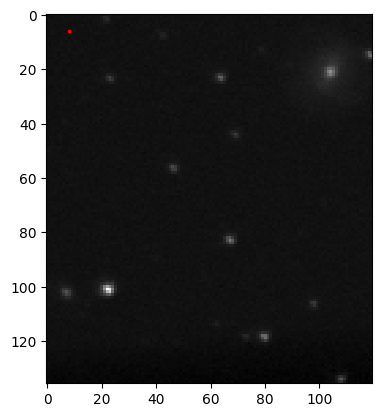

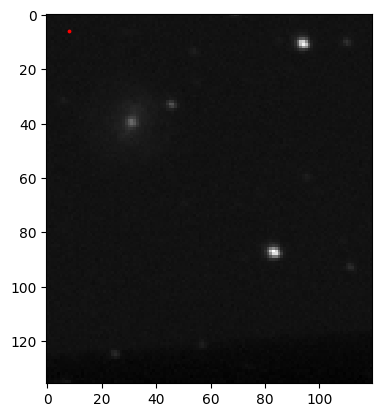

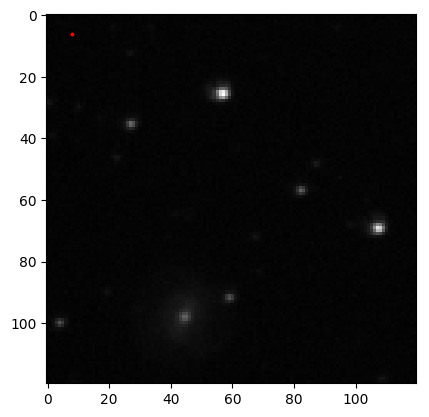

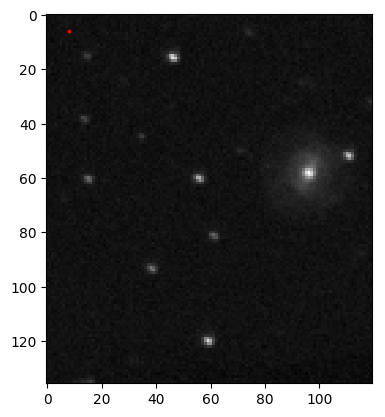

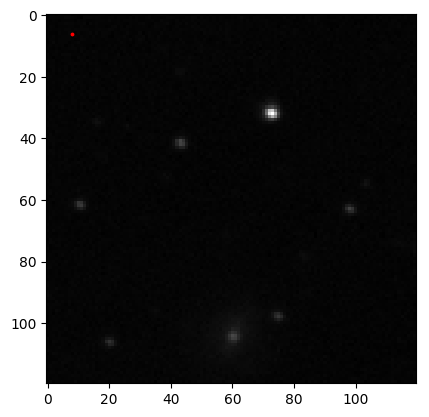

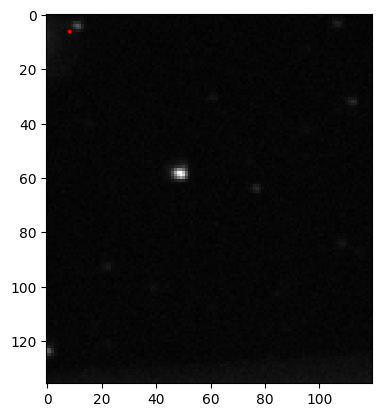

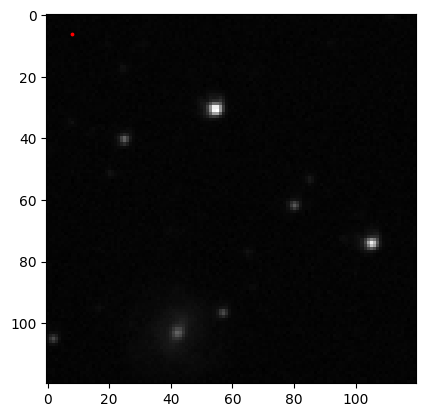

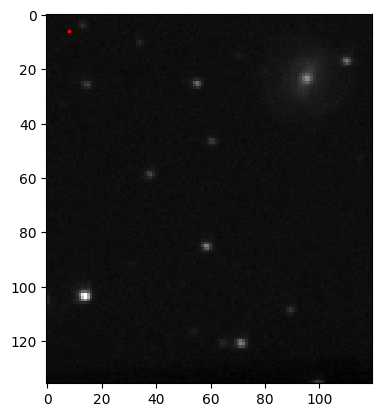

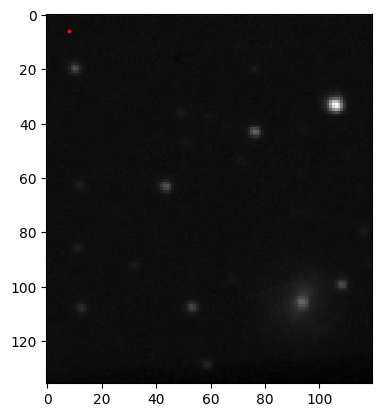

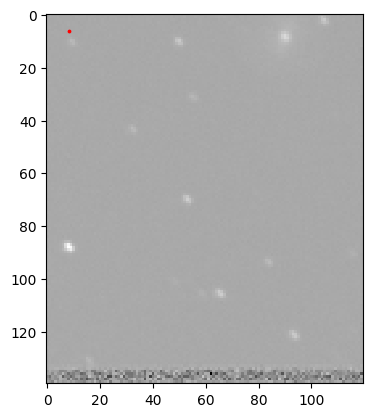

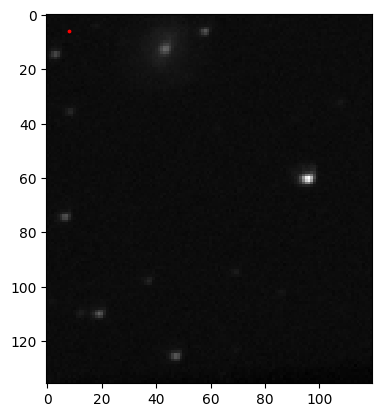

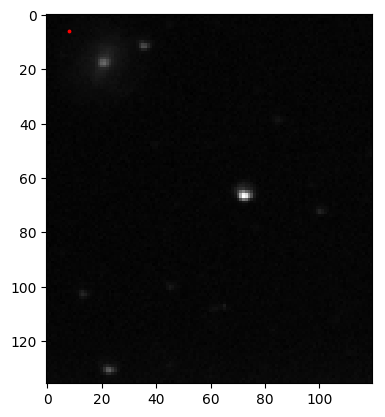

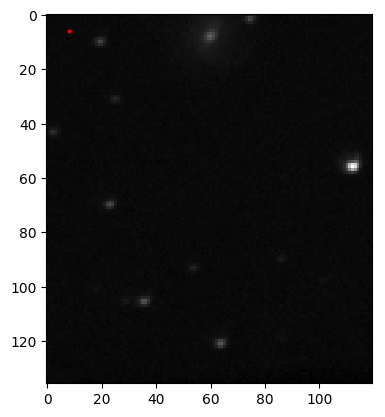

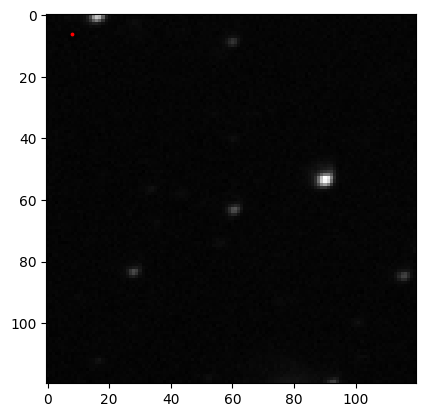

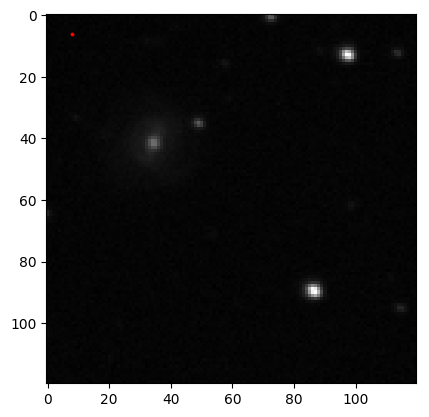

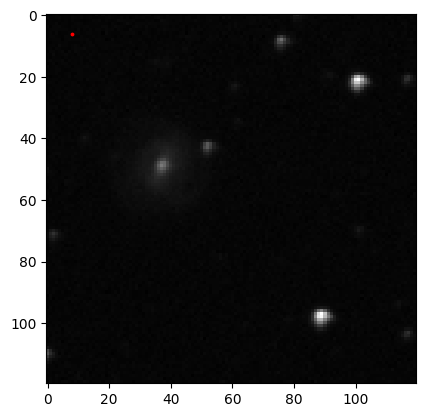

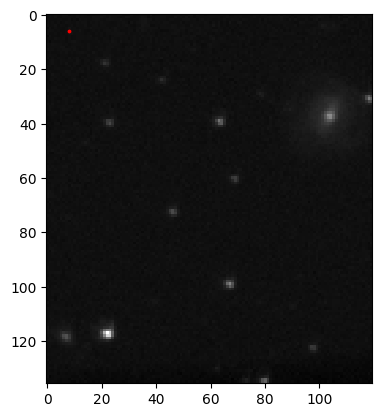

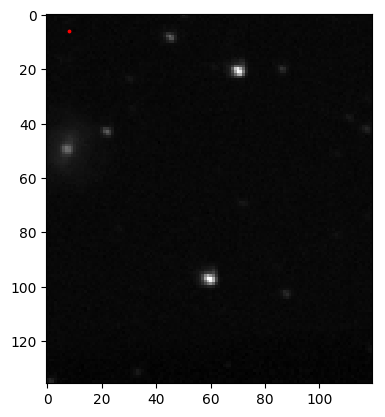

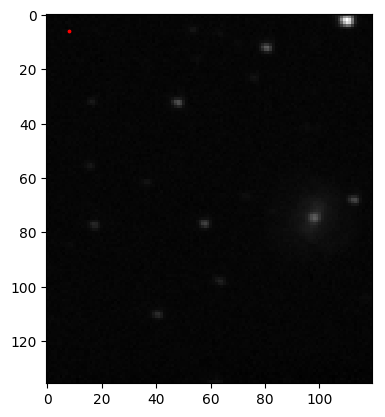

In [15]:
plt.figure()
for elem in list_of_ims:
    #plt.figure()
    plt.imshow(elem, cmap='gray', norm=LogNorm())
    plt.scatter(int(pixcrd[0,0]), int(pixcrd[0,1]),color='r',s=3)
    plt.pause(2)
    plt.show()